In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

In [218]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
seed_everything(1)

In [219]:
tf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.RandomAffine(degrees=90),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

In [220]:
db = torchvision.datasets.ImageFolder(root='cats', transform=tf)

In [221]:
print(db.class_to_idx)

{'lastik': 0, 'other': 1}


In [222]:
batch_size = 16
loader = torch.utils.data.DataLoader(db, batch_size=batch_size, shuffle=True, num_workers=6)
classes = ('lastik', 'other')

In [223]:
train_set, test_set = torch.utils.data.random_split(db, [0.7, 0.3], generator=torch.Generator().manual_seed(1))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=6)
test_len = len(test_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


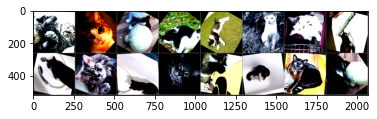

other other lastik other lastik other other lastik lastik other lastik other lastik lastik other lastik


In [224]:
import matplotlib.pyplot as plt
import numpy as np

# функция для показа изображения
def imshow(img):
    img = img  / 2  + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных обучающих изображений
dataiter = iter(train_loader)
images, labels = next(dataiter)

# показать изображения
imshow(torchvision.utils.make_grid(images))
# показать лейблы изображений
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [225]:
import torch.nn as nn
import torch.nn.functional as F
from torch import flatten

In [226]:
class Net_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.do1 = nn.Dropout(0.2) 
        self.fc1 = nn.Linear(61 * 61 * 16, 160)
        self.do2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(160, 84)
        self.fc3 = nn.Linear(84, 2)
        self.fc4 = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = self.do1(x)
        x = F.relu(self.fc1(x))
        x = self.do2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [227]:
class Net_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(10, 25, 5)  
        self.pool = nn.MaxPool2d(2, 2) # 61, 61, 30
        self.do1 = nn.Dropout(0.2) 
        self.fc1 = nn.Linear(61 * 61 * 25, 500)
        self.do2 = nn.Dropout(0.3) 
        self.fc2 = nn.Linear(500, 2)
        self.fc3 = nn.Softmax(dim = 1)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.do1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.do2(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [228]:
class Net_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) # 252, 252, 10
        self.conv2 = nn.Conv2d(10, 10, 5) # 248, 248, 10
        self.pool = nn.MaxPool2d(2, 2) # 124, 124, 10
        self.conv3 = nn.Conv2d(10, 12, 5) # 120, 120, 10
        self.pool = nn.MaxPool2d(2, 2) # 60, 60, 20
        self.do1 = nn.Dropout(0.2) 
        self.fc1 = nn.Linear(60 * 60 * 12, 800)
        self.do2 = nn.Dropout(0.2) 
        self.fc2 = nn.Linear(800, 80)
        self.fc3 = nn.Linear(80, 2)
        self.fc4 = nn.Softmax(dim = 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.do1(x)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = self.do2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.fc4(x)
        return x

In [229]:
class Net_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.do1 = nn.Dropout(0.2) 
        self.fc1 = nn.Linear(158760, 500)
        self.do2 = nn.Dropout(0.3) 
        self.fc2 = nn.Linear(500, 200)
        self.do3 = nn.Dropout(0.2) 
        self.fc3 = nn.Linear(200, 100)
        self.do4 = nn.Dropout(0.2) 
        self.fc4 = nn.Linear(100, 2)
        self.fc5 = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.do1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.do2(x)
        x = F.relu(self.fc2(x))
        x = self.do3(x)
        x = F.relu(self.fc3(x))
        x = self.do4(x) 
        x = self.fc4(x)
        x = self.fc5(x)
        
        return x

In [230]:
nets = [] 
nets.append(Net_1())
nets.append(Net_2())
nets.append(Net_3())
nets.append(Net_4())

In [231]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [232]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

In [233]:
for i, net in enumerate(nets):
    print(f'---- net {i} ----')
    print(type(net))
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(4): 
        running_loss = 0.0
        for j, data in enumerate(train_loader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if j % 30 == 29: 
                print(f'[{epoch + 1}, {j + 1:5d}] loss: {running_loss / 10:.3f}')
                running_loss = 0.0
    print('Finished Training')

    #Сохранение нашей модели
    path = './cats_net_'+ str(i) +'.pth'
    print(path)
    torch.save(net.state_dict(), path)

    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    outputs = net(images)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the {test_len} test images: {100 * correct // total} %')

    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    param_count = get_n_params(net)
    print(f'Model size: {param_count} parametres')

---- net 0 ----
<class '__main__.Net_1'>
[1,    30] loss: 2.075
[1,    60] loss: 2.062
[2,    30] loss: 2.026
[2,    60] loss: 1.985
[3,    30] loss: 1.881
[3,    60] loss: 1.938
[4,    30] loss: 1.843
[4,    60] loss: 1.776
Finished Training
./cats_net_0.pth
Accuracy of the network on the 464 test images: 69 %
Accuracy for class: lastik is 77.1 %
Accuracy for class: other is 61.4 %
Model size: 9542486 parametres
---- net 1 ----
<class '__main__.Net_2'>
[1,    30] loss: 2.040
[1,    60] loss: 1.898
[2,    30] loss: 1.737
[2,    60] loss: 1.650
[3,    30] loss: 1.551
[3,    60] loss: 1.658
[4,    30] loss: 1.615
[4,    60] loss: 1.452
Finished Training
./cats_net_1.pth
Accuracy of the network on the 464 test images: 78 %
Accuracy for class: lastik is 75.3 %
Accuracy for class: other is 79.8 %
Model size: 46521037 parametres
---- net 2 ----
<class '__main__.Net_3'>
[1,    30] loss: 2.079
[1,    60] loss: 2.077
[2,    30] loss: 2.069
[2,    60] loss: 2.055
[3,    30] loss: 2.018
[3,    60

In [234]:
nets = []
net_1 = Net_1()
net_1.load_state_dict(torch.load('cats_net_0.pth'))
nets.append(net_1)
net_2 = Net_2()
net_2.load_state_dict(torch.load('cats_net_1.pth'))
nets.append(net_2)
net_3 = Net_3()
net_3.load_state_dict(torch.load('cats_net_2.pth'))
nets.append(net_3)
net_4 = Net_4()
net_4.load_state_dict(torch.load('cats_net_3.pth'))
nets.append(net_4)

In [235]:
from PIL import Image
def image_loader(image_name):
    tf_eval = transforms.Compose([
    transforms.Resize(256), 
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_name)
    image = tf_eval(image).unsqueeze(0)
    return image

(<matplotlib.image.AxesImage at 0x28f03df10d0>, ([], []), ([], []))

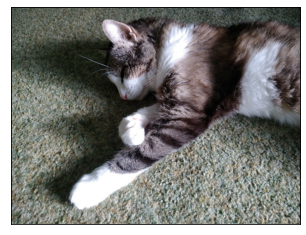

In [236]:
plt.imshow(Image.open('./lastik_example.jpg')), plt.xticks([]), plt.yticks([])

In [237]:
image = image_loader('./lastik_example.jpg')

In [244]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def pre_image(image, model, classes):
   with torch.no_grad():
      model.eval()  
      output = model(image)
      index = output.data.cpu().numpy().argmax()
      class_name = classes[index]
      return class_name

In [245]:
for i, net in enumerate(nets):
    print(f"Net {i} says it's {pre_image(image, net, db.classes)}")

Net 0 says it's lastik
Net 1 says it's other
Net 2 says it's lastik
Net 3 says it's lastik
